Populating the interactive namespace from numpy and matplotlib


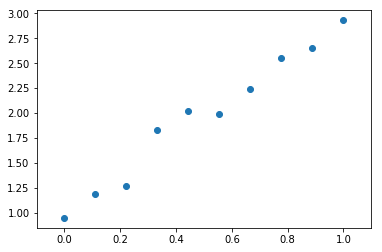

In [6]:
# basic setup of the notebook
%pylab inline
from pprint import pprint # we use this to pretty print some stuff later

def line(x, a, b):
    return a + x * b

data_x = linspace(0, 1, 10)
# precomputed random numbers from a normal distribution
offsets = array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,  1.36682387,
                 -1.15424221, -0.91425267, -0.03395604, -1.27611719, -0.7004073 ])
data_y = line(data_x, 1, 2) + 0.1 * offsets # generate some data points with random offsets
plot(data_x, data_y, "o")
xlim(-0.1, 1.1);

In [7]:
def least_squares(a, b):
    yvar = 0.01
    return sum((data_y - line(data_x, a, b)) ** 2 / yvar)

In [8]:
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

In [9]:
m = Minuit(least_squares) # we create an instance of Minuit and pass the function to minimize

/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a does not have initial value. Assume 0.
  """Entry point for launching an IPython kernel.
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b does not have initial value. Assume 0.
  """Entry point for launching an IPython kernel.
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packag

In [10]:
m = Minuit(least_squares, a=5, b=5) # pass starting values for a and b

/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.


In [11]:
m = Minuit(least_squares, a=5, b=5, error_a=0.1, error_b=0.1)

/Users/chwei/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.


In [12]:
m = Minuit(least_squares, a=5, b=5, error_a=0.1, error_b=0.1, errordef=1)

In [13]:
m = Minuit(least_squares, pedantic=False)  # silence warnings, use default values

In [14]:
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.0    |    1.0    |            |            |         |         |       |
| 1 | b    |    0.0    |    1.0    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [15]:
m = Minuit(least_squares, a=5, b=5,
           error_a=0.1, error_b=0.1,
           limit_a=(0, None), limit_b=(0, 10),
           errordef=1)
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   5.00    |   0.10    |            |            |    0    |         |       |
| 1 | b    |   5.00    |   0.10    |            |            |    0    |   10    |       |
------------------------------------------------------------------------------------------

In [16]:
m = Minuit(least_squares, a=5, b=5, fix_a=True,
           error_a=0.1, error_b=0.1,
           errordef=1)
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   5.00    |   0.10    |            |            |         |         |  yes  |
| 1 | b    |   5.00    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [17]:
# migrad will not vary a, only b
m.migrad()

------------------------------------------------------------------
| FCN = 4663                    |      Ncalls=13 (13 total)      |
| EDM = 7E-14 (Goal: 1E-05)     |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   5.00    |   0.10    |            |            |         |         |  yes  |
| 1 | b    |   -3.75   |    0.05   |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [18]:
from iminuit import describe

def foo(x, y, z): pass
assert describe(foo) == ['x', 'y', 'z']

class Foo:
    def __call__(self, a, b):
        pass

assert describe(Foo()) == ['a', 'b']

In [19]:
def bar(*args):  # function with variable number of arguments
    return sum((array(args) - 1) ** 2)

try:
    describe(bar)  # this will raise a TypeError
except TypeError as e:
    pprint(e)

TypeError('Unable to obtain function signature')


In [20]:
m = Minuit(bar, forced_parameters=('a', 'b'), a=1, b=2, pedantic=False)
m.migrad()

------------------------------------------------------------------
| FCN = 5.385E-24               |      Ncalls=24 (24 total)      |
| EDM = 5.38E-24 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    1.0    |    1.0    |            |            |         |         |       |
| 1 | b    |    1.0    |    1.0    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [21]:
import numpy as np

def least_squares_np(par):  # par is a numpy array here 
    mu = np.polyval(par, data_x)  # for par = (a, b) this is a line
    yvar = 0.01
    return np.sum((data_y - mu) ** 2 / yvar)

In [22]:
m = Minuit.from_array_func(least_squares_np, (5, 5), error=(0.1, 0.1), errordef=1)
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | x0   |   5.00    |   0.10    |            |            |         |         |       |
| 1 | x1   |   5.00    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [23]:
m = Minuit.from_array_func(least_squares_np, (5, 5), error=(0.1, 0.1), fix=(True, False),
                           limit=((0, None), (0, 10)),
                           name = ("a", "b"), errordef=1)
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   5.00    |   0.10    |            |            |    0    |         |  yes  |
| 1 | b    |   5.00    |   0.10    |            |            |    0    |   10    |       |
------------------------------------------------------------------------------------------

In [24]:
m = Minuit.from_array_func(least_squares_np, (5, 5, 5, 5), error=0.1, errordef=1)
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | x0   |   5.00    |   0.10    |            |            |         |         |       |
| 1 | x1   |   5.00    |   0.10    |            |            |         |         |       |
| 2 | x2   |   5.00    |   0.10    |            |            |         |         |       |
| 3 | x3   |   5.00    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [25]:
from iminuit import minimize  # has same interface as scipy.optimize.minimize
minimize(least_squares_np, (5, 5))

      fun: 10.387011251394036
 hess_inv: array([[ 0.00981818, -0.00490909],
       [-0.00490909,  0.00345455]])
  message: 'Optimization terminated successfully.'
   minuit: <iminuit._libiminuit.Minuit object at 0x7fee7ddefc68>
     nfev: 36
     njev: 0
  success: True
        x: array([1.9449447 , 0.99096644])

In [26]:
m = Minuit(least_squares, a=5, b=5, error_a=0.1, error_b=0.1, errordef=1)
m.migrad()

------------------------------------------------------------------
| FCN = 10.39                   |      Ncalls=32 (32 total)      |
| EDM = 1.38E-21 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   0.99    |   0.06    |            |            |         |         |       |
| 1 | b    |   1.94    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [27]:
pprint(m.get_fmin())

FMin(fval=10.38701125139405, edm=1.38398344663906e-21, tolerance=0.1, nfcn=32, ncalls=32, up=1.0, is_valid=True, has_valid_parameters=True, has_accurate_covar=True, has_posdef_covar=True, has_made_posdef_covar=False, hesse_failed=False, has_covariance=True, is_above_max_edm=False, has_reached_call_limit=False)


In [28]:
pprint(m.get_param_states())

[Param(number=0, name='a', value=0.9909664415272668, error=0.05877538150833177, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None),
 Param(number=1, name='b', value=1.9449447037454457, error=0.09908673918625613, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None)]


In [29]:
m.fval / (len(data_y) - 2)  # reduced chi2

1.2983764064242562

In [30]:
m.hesse()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   0.99    |   0.06    |            |            |         |         |       |
| 1 | b    |   1.94    |   0.10    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [31]:
m.matrix(correlation=True)

-----------------
|   |    a    b |
-----------------
| a |  1.0 -0.8 |
| b | -0.8  1.0 |
-----------------

In [32]:
m.matrix()

---------------------
|   |      a      b |
---------------------
| a |  0.003 -0.005 |
| b | -0.005  0.010 |
---------------------

In [33]:
pprint(m.matrix(correlation=True))  # correlation matrix as before
pprint(m.matrix())  # covariance matrix

((1.0, -0.8429272368219684), (-0.8429272368219684, 1.0))
((0.003454545587261548, -0.004909091141560154),
 (-0.004909091141560154, 0.0098181822218111))


In [34]:
pprint(m.np_matrix())  # m.np_matrix(correlation=True) also works

array([[ 0.00345455, -0.00490909],
       [-0.00490909,  0.00981818]])


In [35]:
m.minos()

-------------------------------------------------
|        a        |            Valid            |
-------------------------------------------------
|      Error      |    -0.06     |     0.06     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|        b        |            Valid            |
-------------------------------------------------
|      Error      |    -0.10     |     0.10     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------

In [36]:
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.99   |    0.06   |   -0.06    |    0.06    |         |         |       |
| 1 | b    |    1.94   |    0.10   |   -0.10    |    0.10    |         |         |       |
------------------------------------------------------------------------------------------

In [37]:
pprint(m.values)  # dict-like view of the parameter values
# access values by name or index
pprint("by name")
pprint(m.values["a"])
pprint("by index")
pprint(m.values[0])

# you can also iterate over the view like you would over a dict
for key, value in m.values.items():
    pprint((key, value))

pprint("Hesse errors")
pprint(m.errors)  # dict-like view of symmetric uncertainties
# you can access errors in the same ways as for m.values

pprint("Minos errors")
pprint(m.merrors)  # asymmetric uncertainties
pprint("Hesse covariance")
pprint(m.covariance)  # the covariance matrix computed by Hesse

<ValueView of Minuit at 7fee7dfdc4c8>
  a: 0.9909664415272668
  b: 1.9449447037454457
'by name'
0.9909664415272668
'by index'
0.9909664415272668
('a', 0.9909664415272668)
('b', 1.9449447037454457)
'Hesse errors'
<ErrorView of Minuit at 7fee7dfdc4c8>
  a: 0.05877538249353676
  b: 0.09908674089811967
'Minos errors'
{('a', -1.0): -0.05877538136452026,
 ('a', 1.0): 0.058775381364531906,
 ('b', -1.0): -0.09908673886136363,
 ('b', 1.0): 0.09908673886138124}
'Hesse covariance'
{('a', 'a'): 0.003454545587261548,
 ('a', 'b'): -0.004909091141560154,
 ('b', 'a'): -0.004909091141560154,
 ('b', 'b'): 0.0098181822218111}


In [38]:
# note these are methods and not a properties
pprint(m.np_values())
pprint(m.np_errors())
pprint(m.np_merrors())
pprint(m.np_covariance())

array([0.99096644, 1.9449447 ])
array([0.05877538, 0.09908674])
array([[0.05877538, 0.09908674],
       [0.05877538, 0.09908674]])
array([[ 0.00345455, -0.00490909],
       [-0.00490909,  0.00981818]])


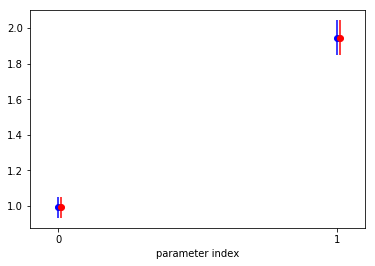

In [40]:
v = m.np_values()
ve = m.np_errors()
vm = m.np_merrors()
# show hesse errors
errorbar((0, 1), v, ve, fmt="ob");
# show minos errors
errorbar((0.01, 1.01), v, vm, fmt="or"); # add a little offset so that the error bars don't overlap
xlabel("parameter index")
xticks((0, 1))
xlim(-0.1, 1.1);

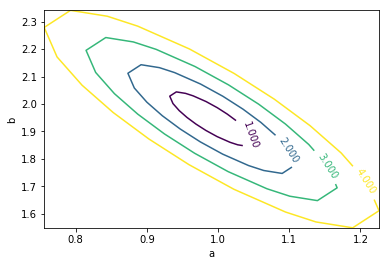

In [41]:
m.draw_mncontour('a','b', nsigma=4);  # nsigma=4 says: draw four contours from sigma=1 to 4

In [42]:
# get individual minos contours for plotting them yourself
param_a, param_b, ctr_xy = m.mncontour('a','b', sigma=2)
pprint(ctr_xy)

[(0.8734156787982194, 2.1119905244655923),
 (0.8824239281811733, 2.0582549073935645),
 (0.8999995907730525, 2.0066820348391534),
 (0.9218435068100065, 1.9569310517835712),
 (0.9468999238515619, 1.9087180561510038),
 (0.9750759205046066, 1.8618818581214405),
 (1.0065114362059702, 1.8171680505688939),
 (1.0428579642045699, 1.775532427960336),
 (1.0642095274128394, 1.7574662169785074),
 (1.090053180388609, 1.7467712260227068),
 (1.1085172042563223, 1.77789888252932),
 (1.099508954984477, 1.8316344996970808),
 (1.0819332924061547, 1.8832073723364517),
 (1.0600893763599784, 1.9329583554671692),
 (1.0350329592976528, 1.981171351170653),
 (1.0068569626156654, 2.028007549267934),
 (0.9754214468778168, 2.0727213568839993),
 (0.9390749188272809, 2.1143569795526957),
 (0.9177233555789281, 2.132423190556252),
 (0.8918797025367042, 2.1431181814681968)]


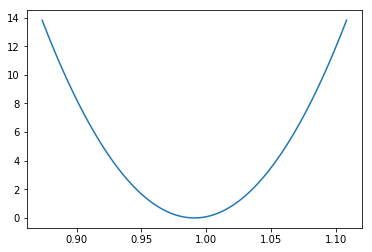

In [43]:
# 1D value Scan
a, fa = m.profile('a', subtract_min=True)
plot(a, fa);

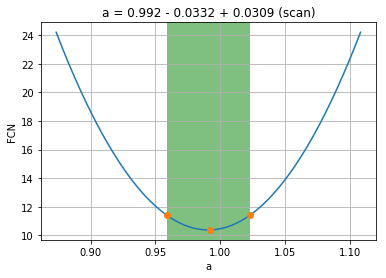

In [44]:
# we provide a convenience wrapper for drawing it which scans the region around the minimum as well
m.draw_profile('a');

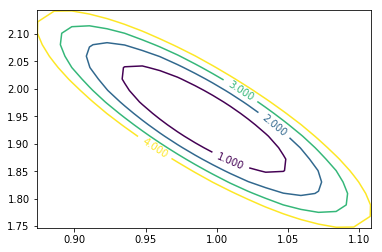

In [45]:
# beware: 2d contour is NOT a Minos contour, these are just contours of the fit function
x,y,z = m.contour('a', 'b', subtract_min=True)
cs = contour(x,y,z, (1, 2, 3, 4)) # these are not sigmas, just the contour values
clabel(cs);

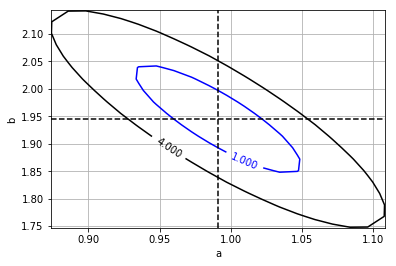

In [46]:
# convenience wrapper
m.draw_contour('a', 'b');